In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import numpy as np
import pandas as pd
import os
import torch
from torchvision.io import read_image
from sklearn.model_selection import train_test_split
import pydicom
from pydicom.data import get_testdata_file
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
#It will iterate through all the images in a specific folder and after iterating one folder it will iterate the next folder images.
#Here for the example purpose , it will iterate just 2 folders i.e 10706 and 21867 folder
import os

folder_count = 0
max_folders = 3

for dirname, _, filenames in os.walk('/kaggle/input/rsna-breast-cancer-detection/train_images'):
    if folder_count >= max_folders:
        break
    for filename in filenames:
        print(os.path.join(dirname, filename))
    folder_count += 1


/kaggle/input/rsna-breast-cancer-detection/train_images/10706/763186195.dcm
/kaggle/input/rsna-breast-cancer-detection/train_images/10706/937109986.dcm
/kaggle/input/rsna-breast-cancer-detection/train_images/10706/34700621.dcm
/kaggle/input/rsna-breast-cancer-detection/train_images/10706/1167990339.dcm
/kaggle/input/rsna-breast-cancer-detection/train_images/21867/1291014447.dcm
/kaggle/input/rsna-breast-cancer-detection/train_images/21867/831671840.dcm
/kaggle/input/rsna-breast-cancer-detection/train_images/21867/1481837831.dcm
/kaggle/input/rsna-breast-cancer-detection/train_images/21867/851000290.dcm


In [3]:
pip install -U pylibjpeg[all]

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install python-gdcm

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Note: you may need to restart the kernel to use updated packages.


In [5]:
folder_path = '/kaggle/input/rsna-breast-cancer-detection/train_images/10049'

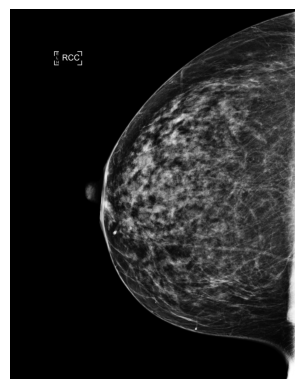

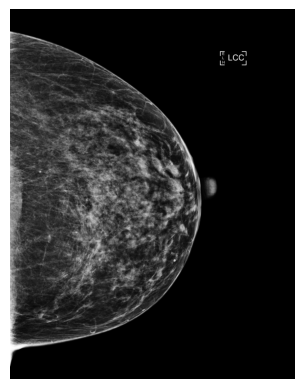

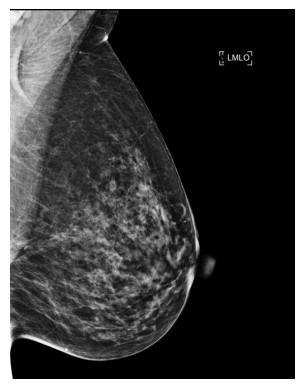

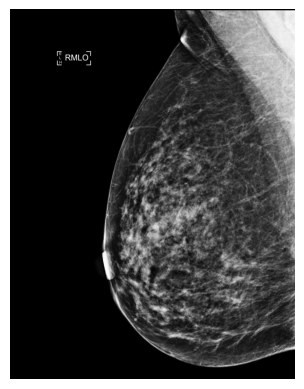

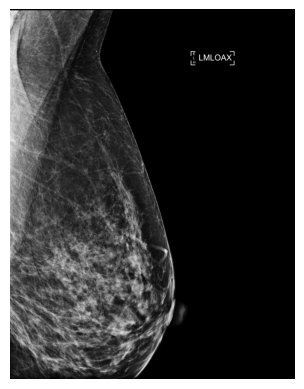

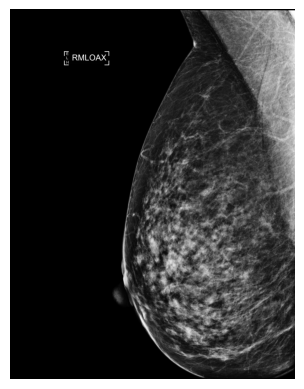

In [6]:
## To print the images of a specific folder , folder path is given in the above cell
#NOTE: Sometimes it may throw error , bcoz this code is used to display the non compressed dcom images, while some images are already compressed, so it will give an error.To avoid it, run the above two cells of pip install ...still it may throw error then try to restart the kernel and run again.
for dirname, _, filenames in os.walk(folder_path):
    for filename in filenames:
        if filename.endswith('.dcm'):
            filepath = os.path.join(dirname, filename)
            ds = pydicom.dcmread(filepath)
            plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
            plt.axis('off')
            plt.show()

Processing folder: 10706


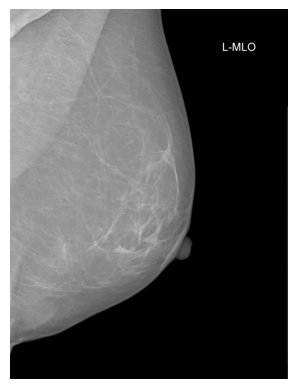

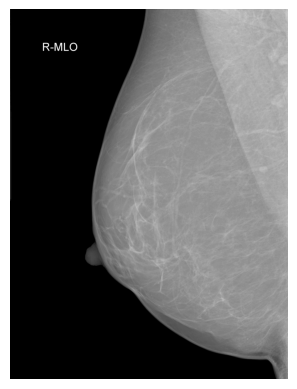

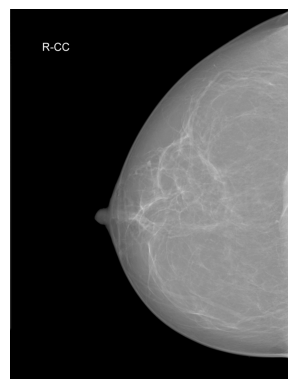

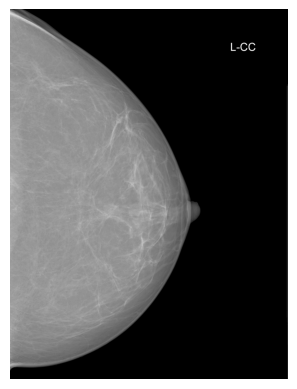

Image IDs in folder 10706: ['763186195', '937109986', '34700621', '1167990339']
Processing folder: 21867


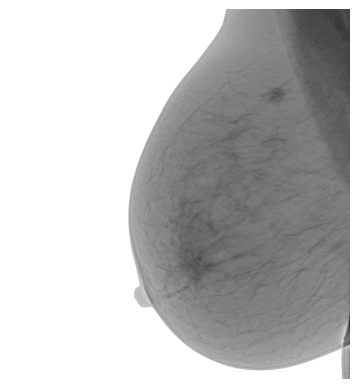

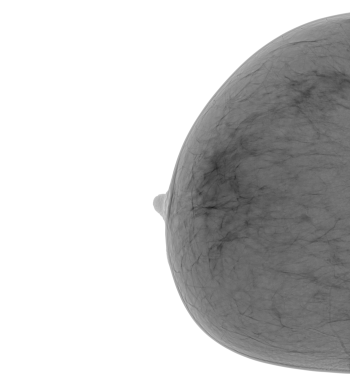

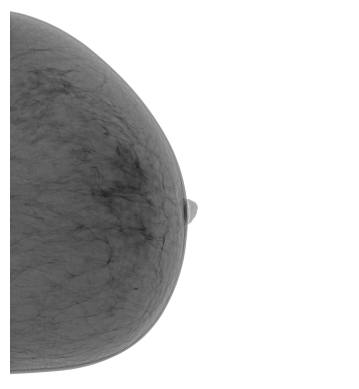

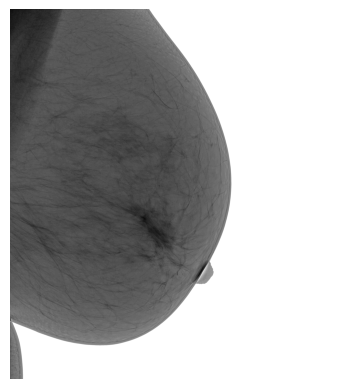

Image IDs in folder 21867: ['1291014447', '831671840', '1481837831', '851000290']
Processing folder: 34867


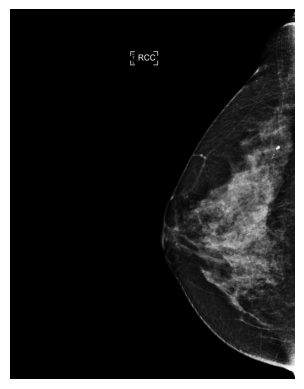

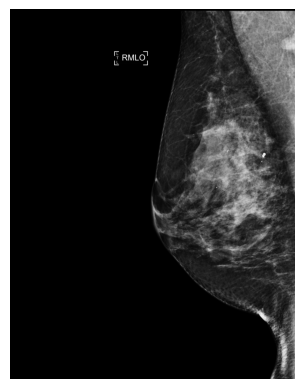

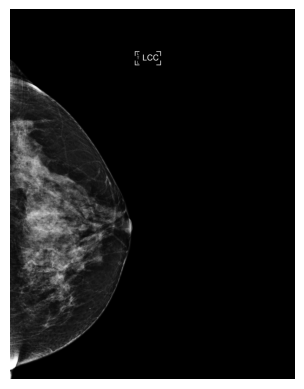

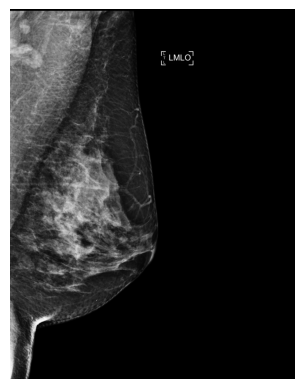

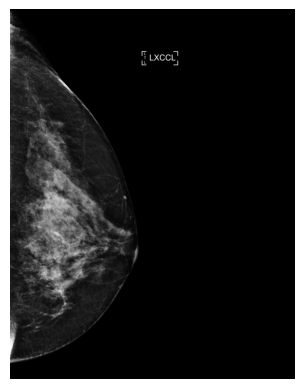

Image IDs in folder 34867: ['1724313070', '1816992952', '1416551830', '1432659037', '2034334966']
Processing folder: 49211


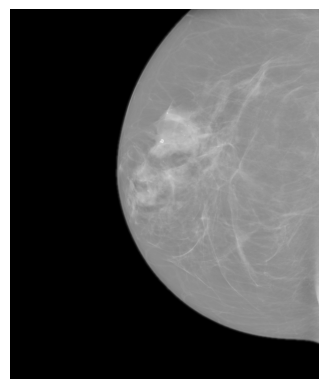

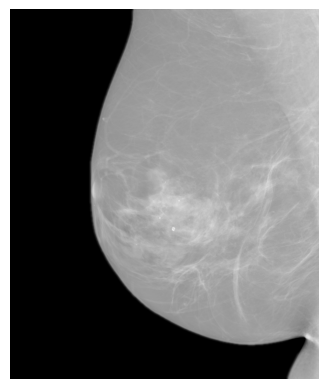

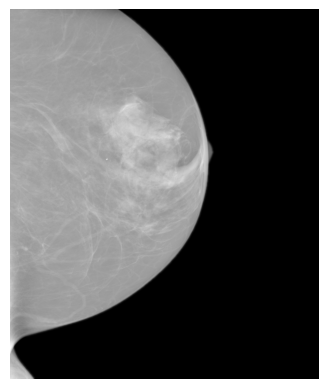

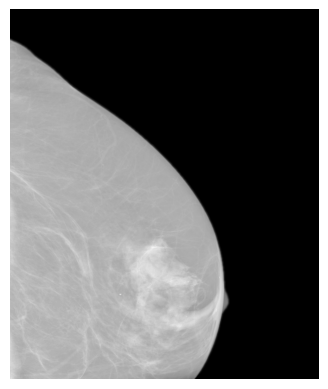

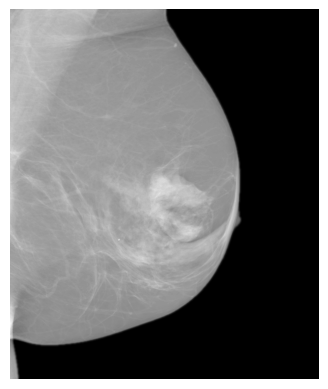

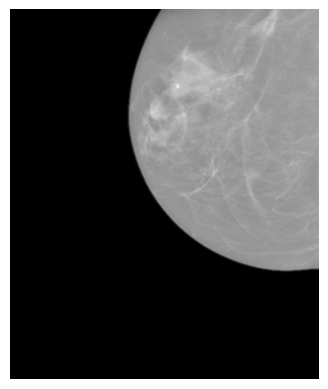

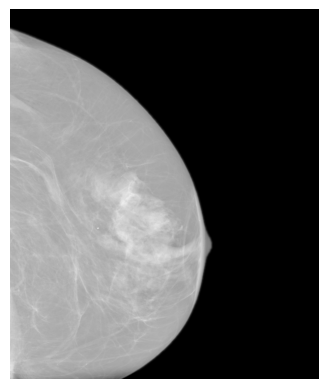

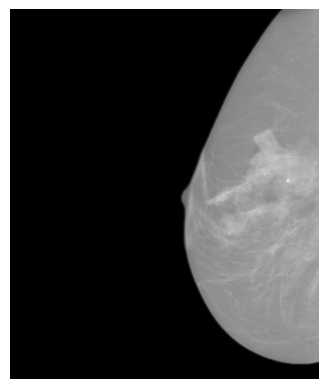

Image IDs in folder 49211: ['769612472', '2050639124', '1791711622', '957550911', '743669243', '695493398', '629307470', '171194015']
Processing folder: 5550


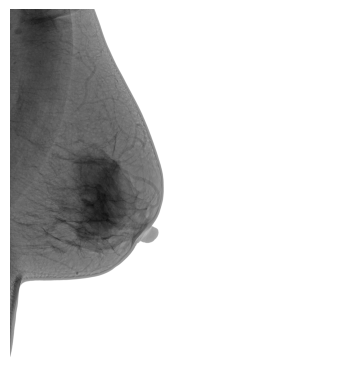

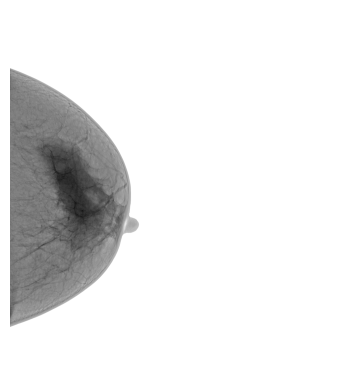

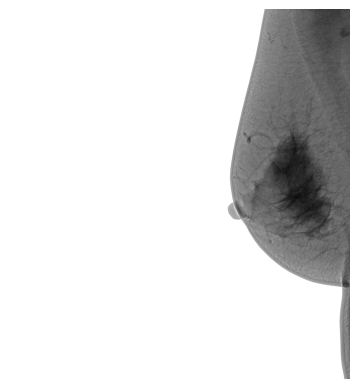

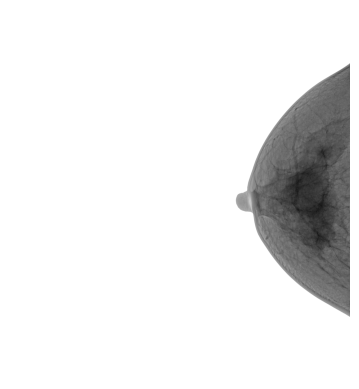

Image IDs in folder 5550: ['1305154817', '194918742', '2073161193', '166627648']
Processing folder: 47903


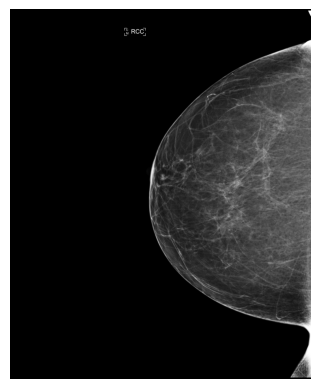

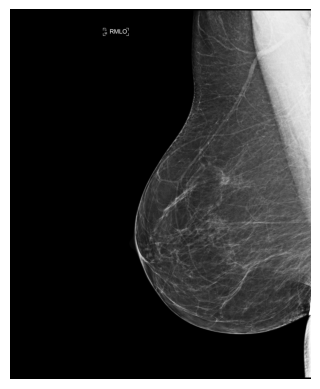

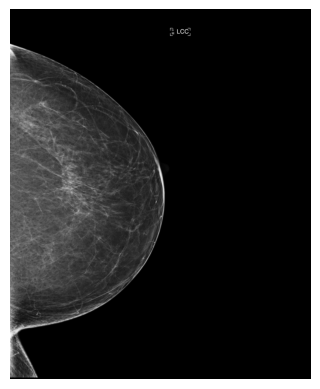

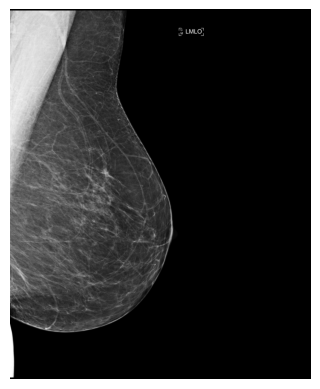

Image IDs in folder 47903: ['1007453454', '837252814', '304866081', '92631687']
Processing folder: 11840


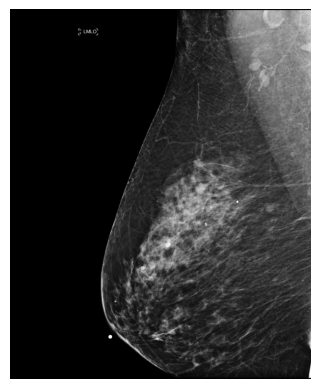

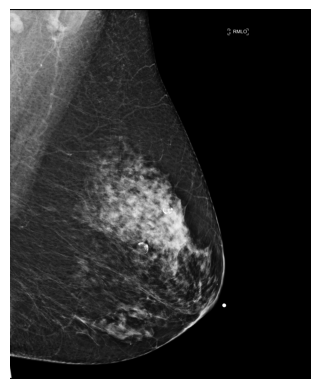

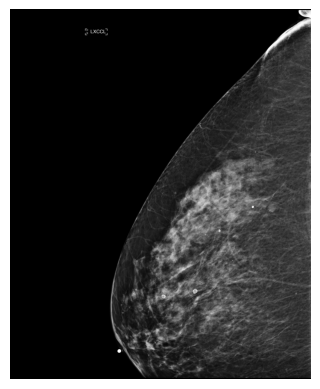

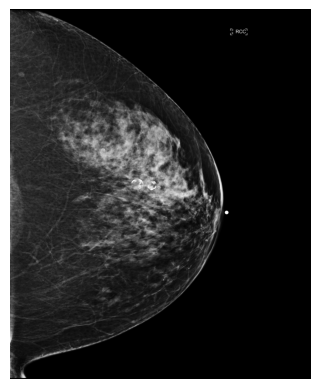

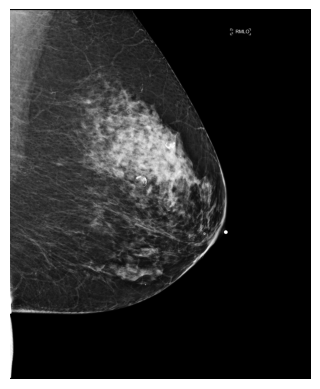

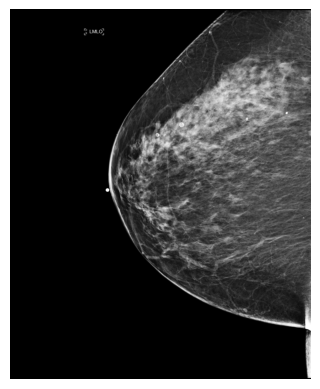

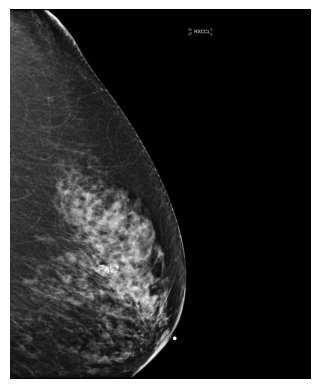

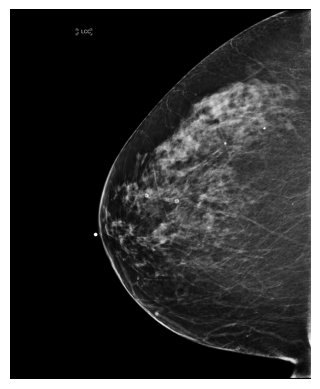

Image IDs in folder 11840: ['550628390', '1232905516', '271416894', '47515441', '1548313911', '841776897', '757337371', '1187394365']
Processing folder: 46113


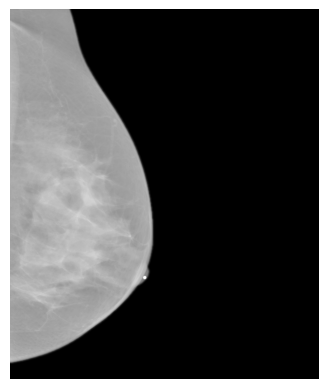

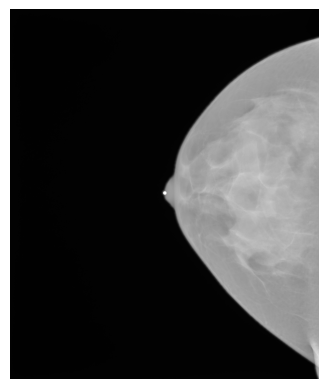

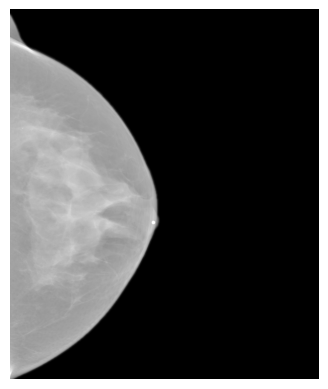

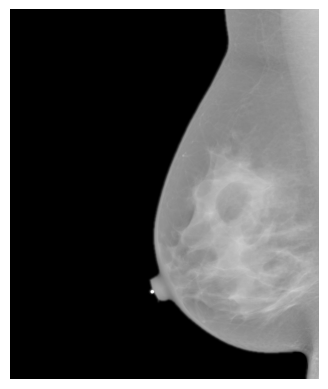

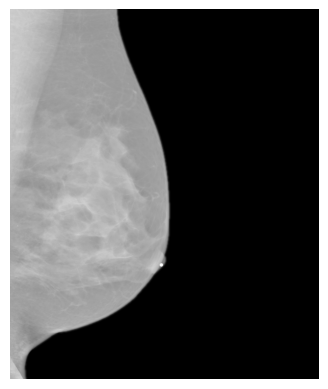

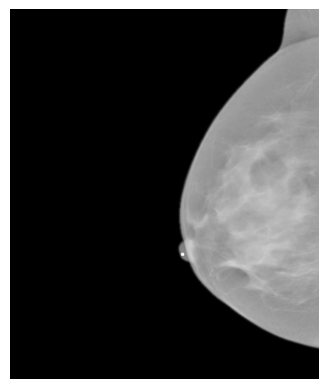

Image IDs in folder 46113: ['622931895', '602720917', '245702546', '1889105740', '325821085', '1811726976']
Processing folder: 43851


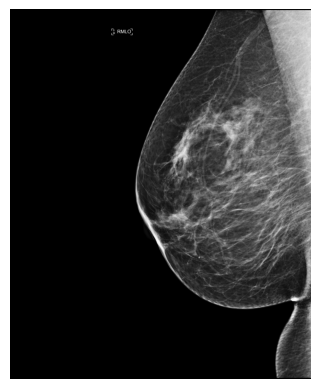

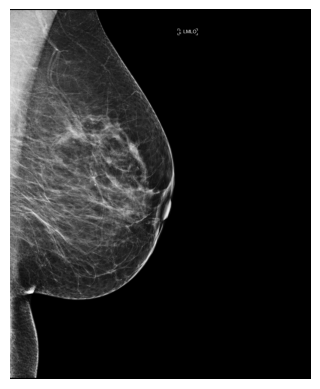

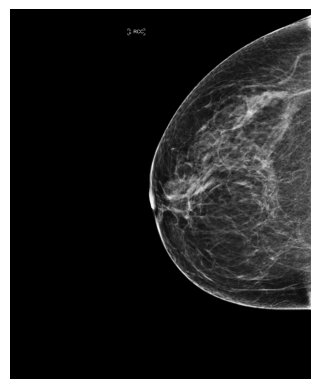

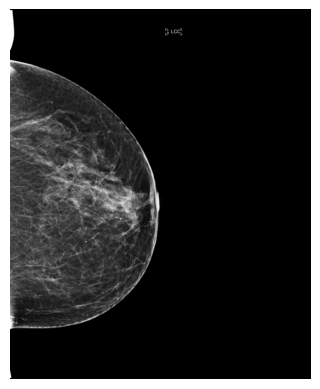

Image IDs in folder 43851: ['1587565948', '779425999', '318681045', '2065422512']
Processing folder: 63745


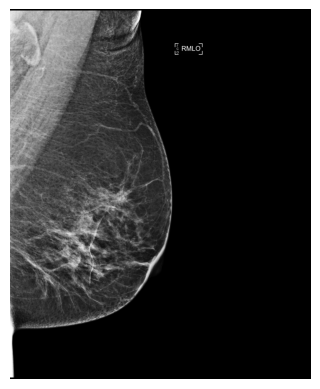

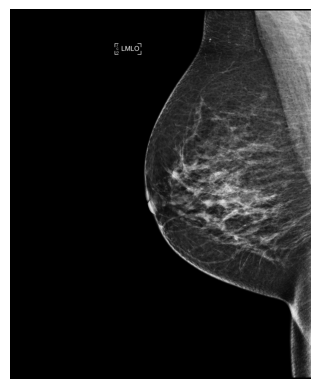

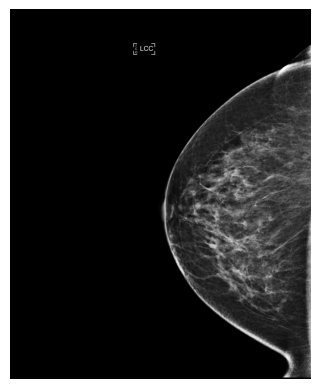

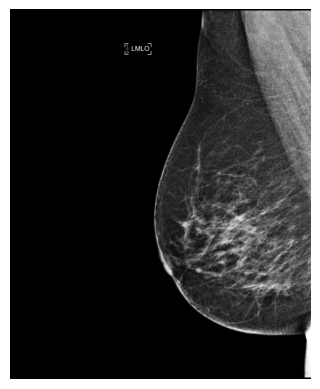

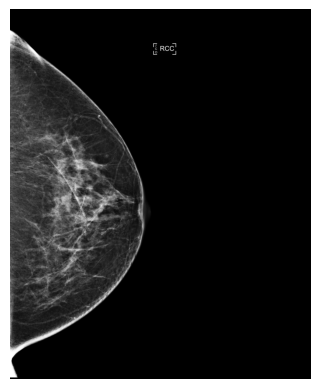

Image IDs in folder 63745: ['1421316488', '2041390037', '1661749135', '2074379756', '285549196']
Total images displayed: 52


In [7]:
#Now to print the images from the multiple folders, this code will help
#The above code was to Display the specific folder only but this will Display all the images from all the folders
#It will print the specific Folder name first then the images inside it and after the images got displayed of specific folder it will print the names of the files/images it disaplyed 
import os
import pydicom
import matplotlib.pyplot as plt

folder_path = '/kaggle/input/rsna-breast-cancer-detection/train_images/'
num_folders = 10  # Number of folders to iterate over

# Get the list of folder names
folders = os.listdir(folder_path)

# Iterate over each folder
count = 0
total_images = 0
for folder in folders:
    folder_dir = os.path.join(folder_path, folder)
    if os.path.isdir(folder_dir):
        print(f"Processing folder: {folder}")
        image_ids = []  # List to store the image IDs
        
        for filename in os.listdir(folder_dir):
            if filename.endswith('.dcm'):
                filepath = os.path.join(folder_dir, filename)
                ds = pydicom.dcmread(filepath)
                plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
                plt.axis('off')
                plt.show()
                
                # Extract the image ID from the filename and add it to the list
                image_id = filename.split('.')[0]
                image_ids.append(image_id)
        
        # Print the image IDs within the folder
        print(f"Image IDs in folder {folder}: {image_ids}")
        total_images += len(image_ids)
        
        count += 1
        if count >= num_folders:
            break

print(f"Total images displayed: {total_images}")


In [8]:
#Now it will make a List of all Images
#The above code displayed the 10 folders conatining 52 images .
#this will Make a list of images and store all the images in that specific List. 
import os
import pydicom

folder_path = '/kaggle/input/rsna-breast-cancer-detection/train_images/'

# Create a list to store all the images
all_images = []

# Set a counter to track the number of folders processed
folder_counter = 0

# Iterate over each folder
for folder_name in os.listdir(folder_path):
    folder_dir = os.path.join(folder_path, folder_name)
    if os.path.isdir(folder_dir):
        # Increment the folder counter
        folder_counter += 1
        
        # Check if the folder counter exceeds 10
        if folder_counter > 10:
            break
        
        for filename in os.listdir(folder_dir):
            if filename.endswith('.dcm'):
                filepath = os.path.join(folder_dir, filename)
                ds = pydicom.dcmread(filepath)
                all_images.append(ds.pixel_array)

# Print the total number of images
print(f"Total images: {len(all_images)}")


Total images: 52


In [ ]:
'''
this is for a specific folder only 
# Create a list of all images
images = []
for image_file in os.listdir(os.path.join("/kaggle/input/rsna-breast-cancer-detection/train_images", folder)):
    if image_file.endswith(".dcm"):
        filepath = os.path.join("/kaggle/input/rsna-breast-cancer-detection/train_images", folder, image_file)
        ds = pydicom.dcmread(filepath)
        images.append(ds.pixel_array)

# this image is list which contanins 4 images so length of this list is 4
print(images[1])
print(images[1].max())
print(images[1].shape)
# Convert the images to NumPy arrays
images = np.array(images)
print(images.shape)
print(len(images))
'''


In [9]:
# Convert the images to NumPy arrays
all_images = np.array(all_images)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [10]:
all_images.shape

(52,)

In [11]:
#To give the input in a CNN model , we neeed a specific amount of pixel to pass through
#So all the images were of High pixel like (5344,4387)
#So we reize all the images into a specifc pixel i.e (256,256)
import numpy as np
from skimage import transform

resized_images = []

for image in all_images:
    resized_image = transform.resize(image, (256, 256))  # Resize the image to (256, 256)
    resized_images.append(resized_image)
    

resized_images = np.array(resized_images)

print(resized_images.shape)  # Check the shape of the resized images array


(52, 256, 256)


In [13]:
(x_train, x_test, y_train, y_test) = train_test_split(resized_images, np.arange(len(all_images)), test_size=0.2)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [14]:
%%time
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

CPU times: user 224 ms, sys: 75.2 ms, total: 299 ms
Wall time: 209 ms


In [15]:
%%time
#Its just a Demonstartion Model, so the epochs were considered only 20 for training purpose
# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 2s 341ms/step - loss: -0.8920 - accuracy: 0.0000e+00
Epoch 2/20
2/2 [==============================] - 1s 341ms/step - loss: -46.7309 - accuracy: 0.0244
Epoch 3/20
2/2 [==============================] - 1s 341ms/step - loss: -217.8016 - accuracy: 0.0244
Epoch 4/20
2/2 [==============================] - 1s 333ms/step - loss: -613.1960 - accuracy: 0.0244
Epoch 5/20
2/2 [==============================] - 1s 333ms/step - loss: -1252.4316 - accuracy: 0.0244
Epoch 6/20
2/2 [==============================] - 1s 346ms/step - loss: -2263.8364 - accuracy: 0.0244
Epoch 7/20
2/2 [==============================] - 1s 340ms/step - loss: -3880.3018 - accuracy: 0.0244
Epoch 8/20
2/2 [==============================] - 1s 325ms/step - loss: -6047.6030 - accuracy: 0.0244
Epoch 9/20
2/2 [==============================] - 1s 327ms/step - loss: -9110.1465 - accuracy: 0.0244
Epoch 10/20
2/2 [==============================] - 1s 340ms/step - loss: -13325.6816 